In [22]:
import os
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ntpath
import matplotlib as mpl
import glob
import requests
#import seq_Analysis_Fx as sq
from scipy import stats
import urllib.request
from xml.dom import minidom
#import alteration_analysis as alt
#import hamdist as ham

In [23]:
folder = r'C:\Users\rratnappan\OneDrive - Foundation Medicine Inc\Jan2023 Precision Study (SAN-CAM)'


In [24]:
path =   r'C:\Users\rratnappan\OneDrive - Foundation Medicine Inc\Jan2023 Precision Study (SAN-CAM)'

In [25]:
os.chdir(path)


In [39]:
sample_TF = pd.read_csv(path + '\Sample_Info.csv')
sample_TF['Source'] = sample_TF['Source'].astype(object)


In [40]:
sample_TF['Source']

0     ORD-1034177-01
1     ORD-1011795-01
2     ORD-0908729-01
3     ORD-1121288-01
4     ORD-1035065-01
5     ORD-0975029-01
6     ORD-0961235-01
7     ORD-1109779-01
8     ORD-1093665-01
9     ORD-0946316-01
10               PMC
11              HD-1
12              HD-2
13              HD-3
14        ScreenedHD
15    ORD-0892554-01
16    ORD-0920266-01
17    ORD-0946985-01
18    ORD-0917426-01
19    ORD-1037716-01
20    ORD-1090654-01
21    ORD-1074252-01
Name: Source, dtype: object

In [41]:
pipeline_dir = 'https://compbio.res.foundationmedicine.com/fo2141r-bt027-pa021-dt016-01-ae1/confera/230224_A01216_0235_BHCHMMDSX5/'

In [42]:
#%%
#pull sample info from pipeline

# Why did you set the Sample_ID as index? Why didn't it work when index was an integer?
samples = pd.read_csv(pipeline_dir+'demux/230224_A01216_0235_BHCHMMDSX5/230224_A01216_0235_BHCHMMDSX5.samplesheet.csv',skiprows=18).set_index('Sample_ID')
#samples

In [43]:
#samples

In [44]:
samples['Source'] = 'PMC'
#samples['Source']

In [45]:
#samples

In [46]:
#samples.loc[samples[~samples.index.str.contains('PMC')].index,'Source']

In [47]:
#### why ~####
#### How is this command splitting the Sample_ID? ####

####samples.loc[samples[~samples.index.str.contains('PMC')].index,'Source'] = samples[~samples.index.str.contains('PMC')].index.str.split('_').map(lambda x:x[0])
####samples

In [48]:
####samples.loc[samples[samples['Source'].str.contains('1121288')].index,'Source'] = 'ORD-1121288-01'#correct sample name

In [49]:
#sample_TF = pd.read_csv(path + '\Sample_Info.csv')
#sample_TF['Source'] = sample_TF['Source'].astype(object)


In [50]:
#create/curate "Source" column
samples['Source'] = 'PMC'
samples.loc[samples[~samples.index.str.contains('PMC')].index,'Source'] = samples[~samples.index.str.contains('PMC')].index.str.split('_').map(lambda x:x[0])
samples.loc[samples[samples['Source'].str.contains('1121288')].index,'Source'] = 'ORD-1121288-01'#correct sample name
samples = samples.merge(sample_TF,on='Source',how='left').set_index('Sample_Name')
ss = pd. DataFrame(samples)
ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_11.csv')

In [254]:
pipeline_dir = 'https://compbio.res.foundationmedicine.com/fo2141r-bt027-pa021-dt016-01-ae1/confera/230224_A01216_0235_BHCHMMDSX5/'

In [10]:

#### How is this getting the information about all the samples? What does + index +... mean?###
df_QC = pd.DataFrame()
for index,row in samples.iterrows():
    df_tmp = pd.read_csv(pipeline_dir + index +'/summary/alt_regions_results/'+ index + '.'+ row['DO'] + '.results.csv')
    df_QC = pd.concat([df_QC,df_tmp])
#ss = pd. DataFrame(df_QC )
#ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_12.csv')

In [268]:
#ss = pd. DataFrame(df_QC)
#ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.1.3.csv')

In [272]:
#df_QC.set_index('ichor_suffix',inplace=True)

In [273]:
#s1 = pd. DataFrame(df_QC)
#s1.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.1.5.csv')

In [275]:
#### Why didn't this work###
#df_QC.loc[df_QC[df_QC['sample_name'].str.contains('PMC')].index,'sample_name'] = 'PMC-01'

In [276]:
s1 = pd. DataFrame(df_QC)
s1.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.1.7.csv')

In [ ]:
s1 = pd. DataFrame(df_QC)
s1.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.1.5.csv')

In [11]:
df_QC_orig = df_QC.copy()
df_QC.set_index('sample_name',inplace=True)
df_QC['Source'] = 'PMC'
df_QC.loc[df_QC[~df_QC.index.str.contains('PMC')].index,'Source'] = df_QC[~df_QC.index.str.contains('PMC')].index.str.split('_').map(lambda x:x[0])
df_QC.loc[df_QC[df_QC['Source'].str.contains('1121288')].index,'Source'] = 'ORD-1121288-01'
df_QC.loc[df_QC[df_QC['Source'].str.contains('PMC')].index,'Source'] = 'PMC-01'

In [265]:
st = pd. DataFrame(df_QC)
st.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.1.2.csv')

In [12]:
df_QC['Dilution'] = 'Neat'
df_QC.loc[df_QC[~df_QC.index.str.contains('PMC')].index,'Dilution'] = df_QC[~df_QC.index.str.contains('PMC')].index.str.split('_').map(lambda x:x[1])


In [13]:
#sz = pd. DataFrame(df_QC)
#sz.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.4.csv')

In [14]:
df_QC['Sample'] = df_QC['Source'] +'_'+ df_QC['Dilution']
# df_QC.loc[df_QC[~df_QC.index.str.contains('PMC')].index,'Sample'] = df_QC[~df_QC.index.str.contains('PMC')].index.str.split('_').map(lambda x:'_'.join(x[:2]))


#### How is this code splitting the second "-", not the first one.####


df_QC['Rep'] = df_QC.index.str.split('-').map(lambda x:x[-1].split('_')[0])
df_QC['Well'] = df_QC.index.str.split('_').map(lambda x:x[-1])

df_QC = df_QC.merge(sample_TF,on='Source')
df_QC['Specimen'] = df_QC['Sample ID'] +'_'+ df_QC['Dilution']

#### Where is this saved? ####
df_QC.to_csv('PreDev_Precision_Plate4.csv')
st = pd. DataFrame(df_QC)
st.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.13.1.csv')

In [236]:
#sa = pd. DataFrame(df_QC)
#sa.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.10.csv')

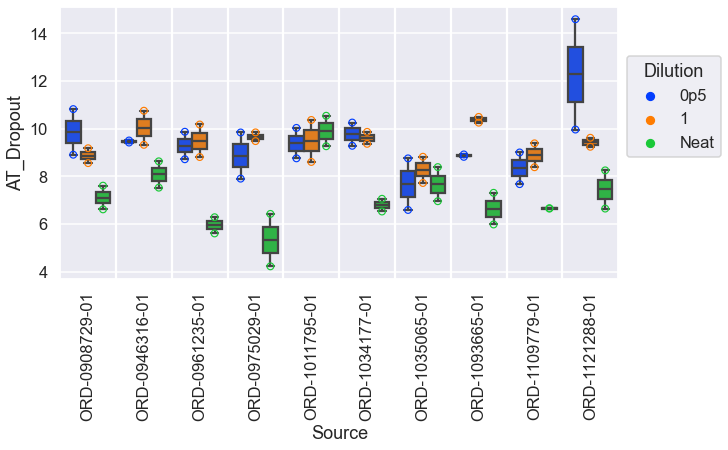

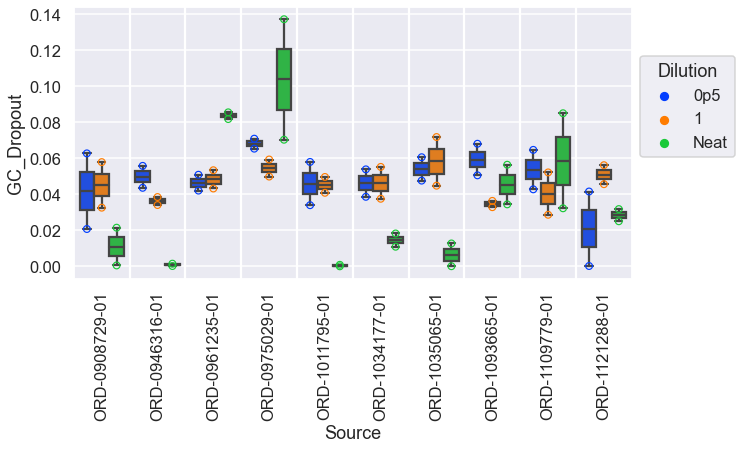

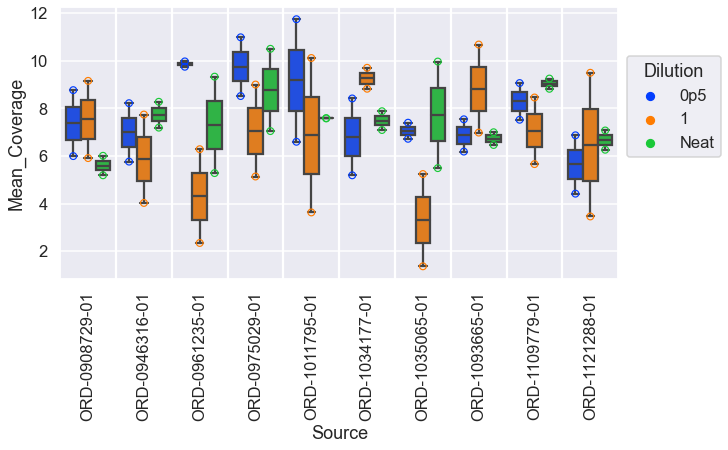

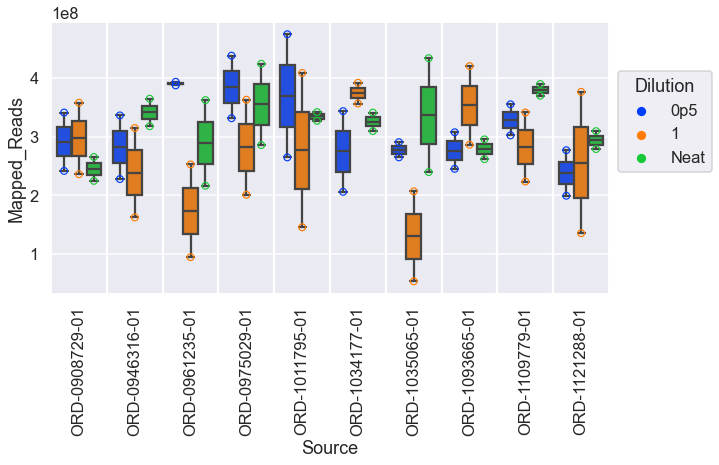

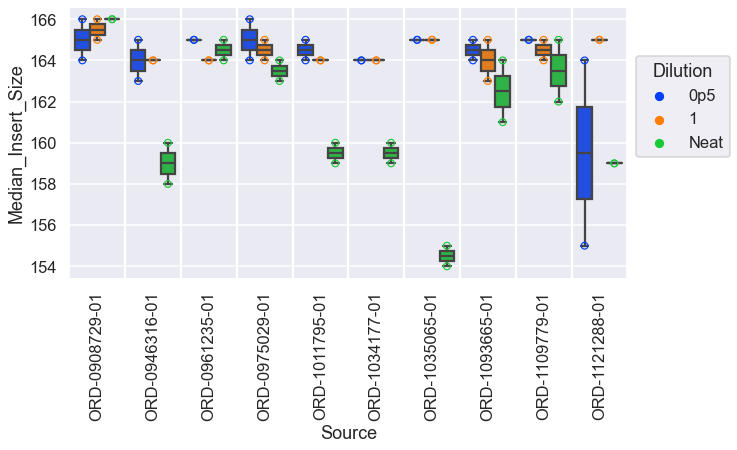

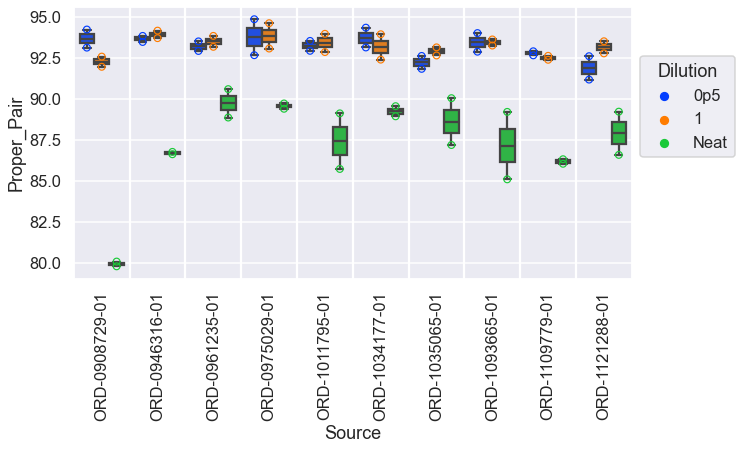

In [51]:
df_QC.sort_values(by='Sample',inplace=True)
#### What are these###
pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

metrics=['AT_Dropout', 'GC_Dropout', 'Mean_Coverage','Mapped_Reads','Median_Insert_Size','Proper_Pair']
 
x_var='Source'
hue_var='Dilution'

mpl.rc('font', **font)
sns.set(style='darkgrid',context='talk')
title='Confera Precision Plate 1'
for yvar in metrics[:]:
    tmp = df_QC[[x_var,hue_var,yvar]]
    # g=sns.FacetGrid(tmp,col='Cycles',size=5,aspect=1)
    axes = plt.figure(figsize=(10,5))
    sns.stripplot(x=x_var,y=yvar,data=tmp,hue=hue_var,dodge=True,palette='bright',jitter=False,size=8,marker=open_circle)#,order=chem_order)
    g = sns.boxplot(x=x_var,y=yvar,hue=hue_var,data=tmp,dodge=True,palette='bright')#,order=chem_order)
    # g.add_legend()
    # g._legend.set_title(hue_var)
    # g.set_axis_labels('',yvar)
    # g.set_xticklabels(rotation=45)
    plt.xticks(rotation=90)
    # g.set_xlabels(x_var)
    

    #     if yvar== '85th Percentile Narrow High Exons Redundant Coverage':
    #         ax.axhline(2000, ls='--',color='black')
    xvar_length = int(len(np.unique(tmp[x_var].values.tolist())))
    for var in range(xvar_length - 1):
        plt.axvline(var + 0.5, color="white")
        
    handles, labels = g.get_legend_handles_labels()
    if hue_var!=None:
        g.legend(handles[:int(len(labels)/2)], labels[:int(len(labels)/2)],loc='upper center',bbox_to_anchor= (1.1,0.85),ncol=1,title=hue_var)
#        m.set_xlabel('')
    # plt.savefig(title+'-'+saveName+'.png',dpi=1200,bbox_inches='tight')

    
    # g.savefig(title+'_'+yvar+'.png',dpi=300,bbox_inches='tight')
        

In [16]:
df_QC['Meth_Score'] = df_QC['ccmf_perfect'].map(lambda x: f'{x:.2E}').astype(str) +' ('+ df_QC['num_reads_perfect_methylated'].astype(str)+'/'+df_QC['num_passed_reads'].astype(str) +')'
Sample_piv = df_QC.pivot_table(index='Specimen',columns='Rep',values='ccmf_perfect')
Sample_piv['Source'] = Sample_piv.index.str.split('_').map(lambda x:x[0])
#### How is -1 counted?####
Sample_piv['Dilution'] = Sample_piv.index.str.split('_').map(lambda x:x[-1])
#sa = pd. DataFrame(Sample_piv)
#sa.to_csv(r'C:\Users\rratnappan\Documents\Confera\Precision Plate_4.17.1.csv')                                           

In [212]:
#df_QC = pd.read_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Precision Plate_4.14.csv')

C:\Users\rratnappan\AppData\Local\Temp\ipykernel_8\3135626582.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  Source_piv = df_QC.pivot(index='Sample ID',columns=['Dilution','Rep'],values='Meth_Score').join(df_QC.drop_duplicates(subset='Sample ID').set_index('Sample ID')['ccmf_threshold'].map(lambda x: f'{x:.2E}'))


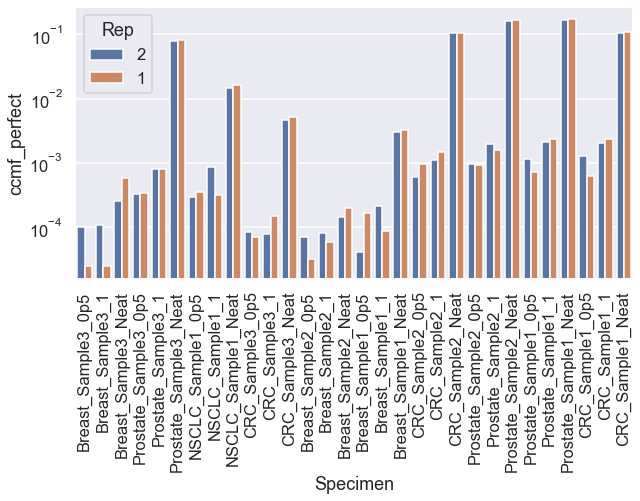

In [18]:

Source_piv = df_QC.pivot(index='Sample ID',columns=['Dilution','Rep'],values='Meth_Score').join(df_QC.drop_duplicates(subset='Sample ID').set_index('Sample ID')['ccmf_threshold'].map(lambda x: f'{x:.2E}'))
Source_piv.to_csv('Sample_CCMF.csv')
# df_tmp = df_QC.sort_values(by='')
plt.figure(figsize=(10,5))
sns.barplot(x='Specimen',y='ccmf_perfect',data=df_QC,hue='Rep')
plt.xticks(rotation=90)
plt.yscale('log')
#%%

#%%




Text(0.5, 1.0, 'CCMF')

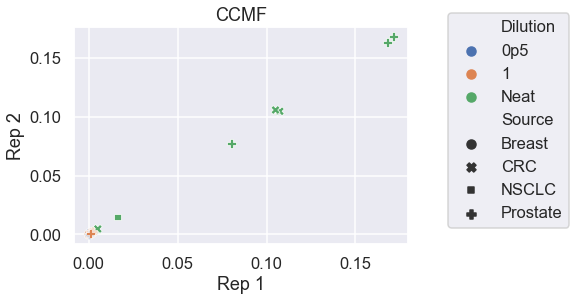

In [19]:
sns.scatterplot(x='1',y='2',data=Sample_piv,hue='Dilution',style='Source')
plt.legend(loc='upper center',bbox_to_anchor= (1.3,1.1),ncol=1)
plt.xlabel('Rep 1')
plt.ylabel('Rep 2')
plt.title('CCMF')

(0.0, 0.0035)

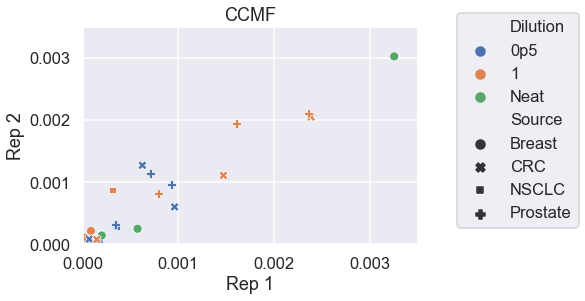

In [20]:
sns.scatterplot(x='1',y='2',data=Sample_piv,hue='Dilution',style='Source')
plt.legend(loc='upper center',bbox_to_anchor= (1.3,1.1),ncol=1)
plt.xlabel('Rep 1')
plt.ylabel('Rep 2')
plt.title('CCMF')
plt.xlim([0,0.0035])
plt.ylim([0,0.0035])